# Evaluation of the Results of the Experiment on Influence of Drought Events

The previous experiment (amplitude of precipitation variation vs. possible income from trade) has shown, that variation in precipitation (that also changes the (time) average precipitation) notable differences in the short and long run development of the System occur.

Following up, this experiments evaluates the influence of one time drought events on the systen state and its recovery after the drought event has ended.

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X6_drought_parameter_scan/results/trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X6_drought_parameter_scan/results/trajectory'
    
data = pd.read_pickle(location)

data.head()

Populating the interactive namespace from numpy and matplotlib


key                                                                        <mean_trajectories>  \
d_length d_severity r_trade timesteps observables                                                
5        0.0        6000    0         MAP                                          1716.330910   
                                      built trade links                               0.000000   
                                      es_income_agricultural_productivity             0.000000   
                                      es_income_forest                             7069.775482   
                                      es_income_pop_density                           0.000000   

key                                                                        <sigma_trajectories>  
d_length d_severity r_trade timesteps observables                                                
5        0.0        6000    0         MAP                                              0.000000  
                                      built trade links                                0.000000  
                                      es_income_agricultural_productivity              0.000000  
                                      es_income_forest                               351.521244  
                                      es_income_pop_density                            0.000000

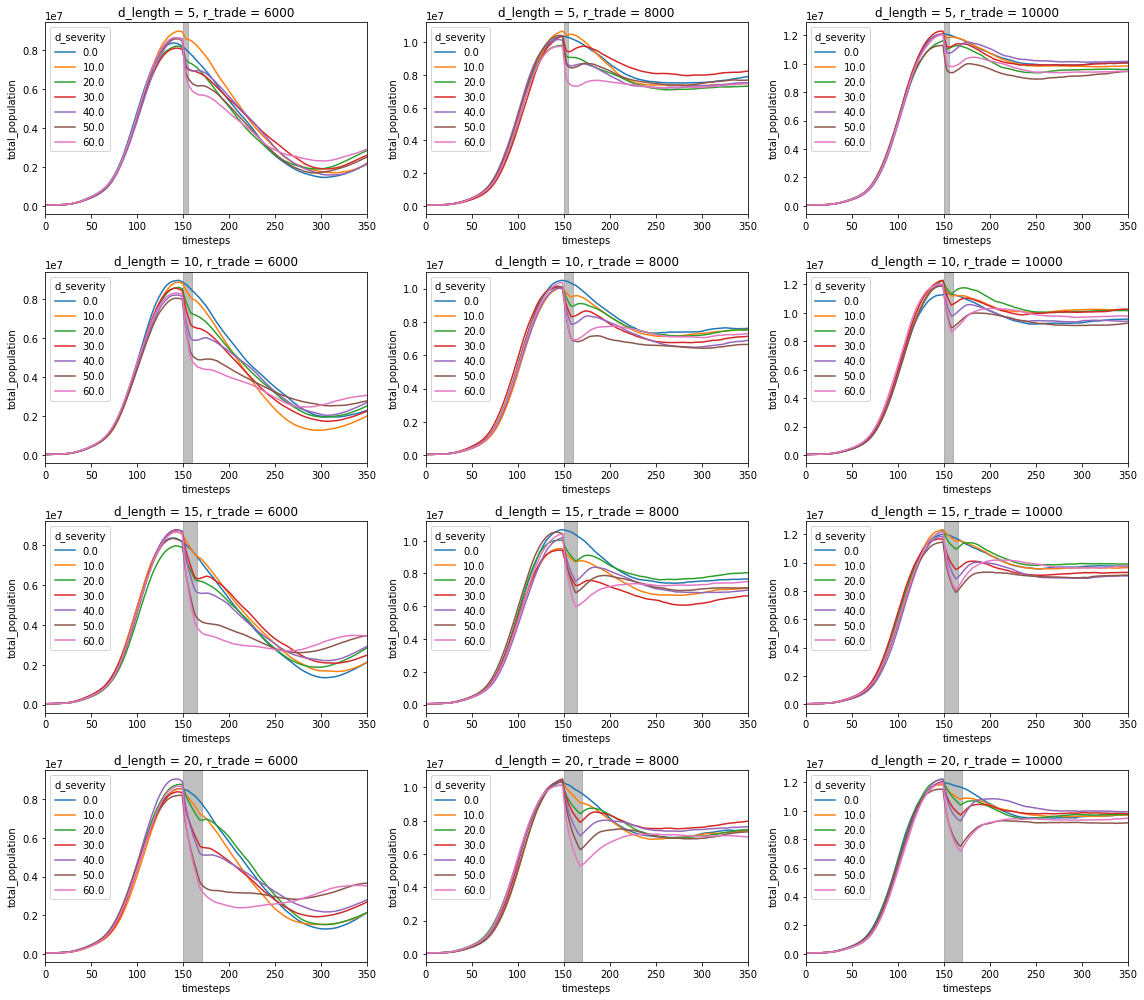

In [2]:
pylab.rcParams['figure.figsize'] = (16, 14)

d_lengths = data.index.levels[0].values
r_trades = data.index.levels[2].values

fig = plt.figure()
for i, d in enumerate(d_lengths):
    for j, r in enumerate(r_trades):
        ax = fig.add_subplot(len(d_lengths), len(r_trades), j + 1 + i * len(r_trades))
        ax.set_title('d_length = {}, r_trade = {}'.format(d, r))
        obs = 'total_population'
        data['<mean_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity').plot(ax=ax)
        ax.set_ylabel(obs)
        ax.axvspan(d_start, d_start + d, alpha=0.5, color='grey')
fig.tight_layout()

This first glance at the development of the total population depending on possible income from trade and the length and severity of droughts shows that one drought does not 'tip' the systen. It rather leads to a sudden drop in population with subsequent recovery. Generally, the trajectories of runs with drought events do even better than those without after recovery.

Question: 
* **what causes this strong and persistent recovery?**
* **would subsequent drought events change this behavior?**
* **does the timing of drought events matter?**

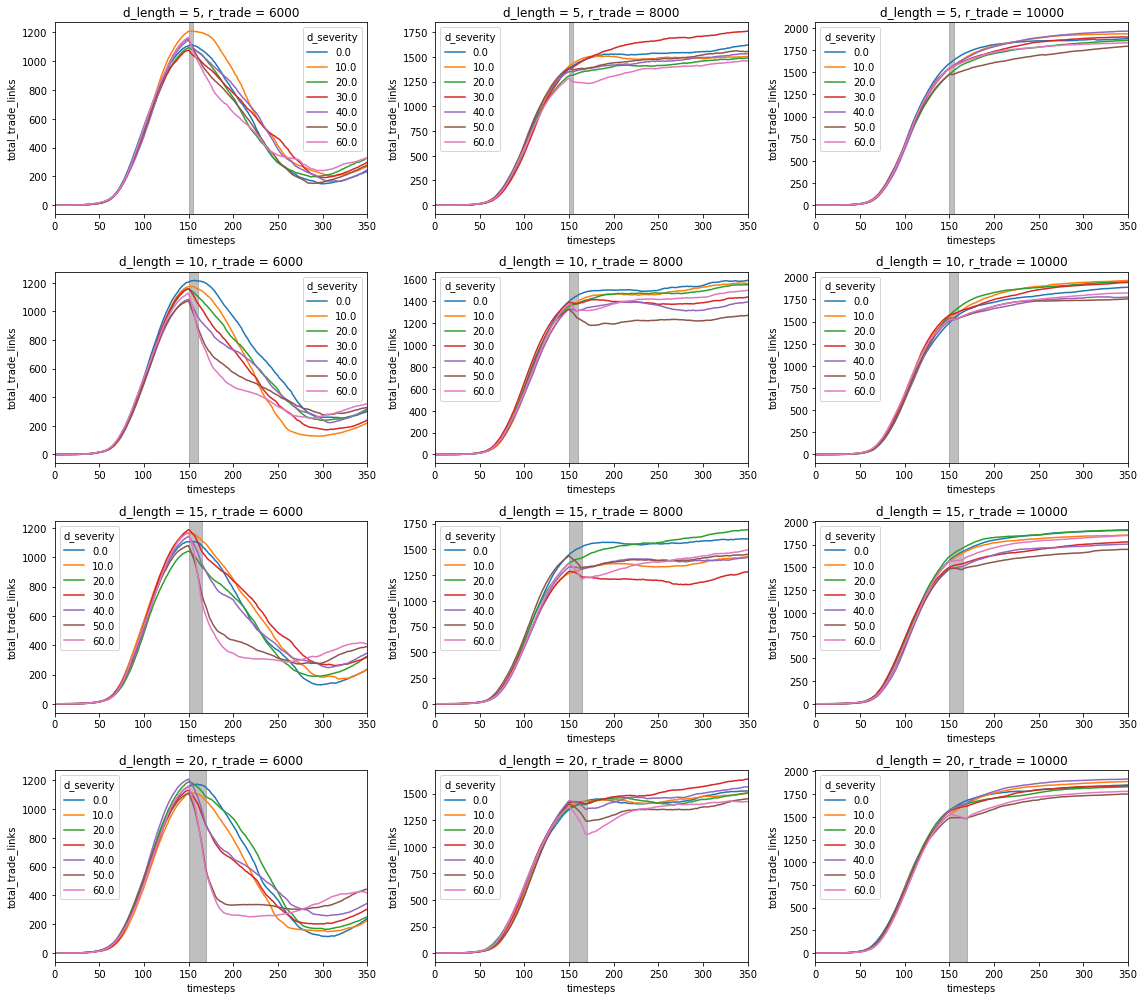

In [3]:
pylab.rcParams['figure.figsize'] = (16, 14)

d_lengths = data.index.levels[0].values
r_trades = data.index.levels[2].values

fig = plt.figure()
for i, d in enumerate(d_lengths):
    for j, r in enumerate(r_trades):
        ax = fig.add_subplot(len(d_lengths), len(r_trades), j + 1 + i * len(r_trades))
        ax.set_title('d_length = {}, r_trade = {}'.format(d, r))
        obs = 'total_trade_links'
        data['<mean_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity').plot(ax=ax)
        ax.set_ylabel(obs)
        ax.axvspan(d_start, d_start + d, alpha=0.5, color='grey')
fig.tight_layout()